# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


In [7]:
cities


['adamstown',
 'rongelap',
 'taulaga',
 'ribeira grande',
 'singkil',
 'iqaluit',
 'barra dos coqueiros',
 'san juan de la rambla',
 'taiohae',
 'alekseyevskoye',
 'port moresby',
 'kailua-kona',
 'imperatriz',
 'tiksi',
 'newman',
 'blackmans bay',
 'mandalay',
 'pahrump',
 'puerto natales',
 'flying fish cove',
 'san patricio',
 'waitangi',
 'grytviken',
 'holmsund',
 'albany',
 'mikumi',
 'isafjordur',
 'papatowai',
 'iskateley',
 'palikir - national government center',
 'ushuaia',
 'hirara',
 'longyearbyen',
 'bethel',
 'thompson',
 'port-aux-francais',
 'gargalianoi',
 'mirnyy',
 'al jawf',
 'tazovsky',
 "'izbat al burj",
 'vingt cinq',
 'yellowknife',
 'lerwick',
 'salaqi',
 'itamaraca',
 'biharamulo',
 'nemuro',
 'ust-nera',
 'margaret river',
 'sitka',
 'polyarnyy',
 'utrik',
 'alotau',
 'hawaiian paradise park',
 'mahina',
 'port elizabeth',
 "st. john's",
 'hovd',
 'dudinka',
 'qurayyat',
 'edinburgh of the seven seas',
 'whitehorse',
 'lebu',
 'botou',
 'junin',
 'keta',
 'a

In [8]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

---

In [4]:
url

'https://api.openweathermap.org/data/2.5/weather?q=saipan&appid=6280b526af190cf5ec09bdc3202cf2d3'

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | rongelap
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | singkil
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | barra dos coqueiros
Processing Record 8 of Set 1 | san juan de la rambla
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | alekseyevskoye
Processing Record 11 of Set 1 | port moresby
Processing Record 12 of Set 1 | kailua-kona
Processing Record 13 of Set 1 | imperatriz
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | newman
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | mandalay
Processing Record 18 of Set 1 | pahrump
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | flying fish cove
Processing Record 21 of Set 1 | san patricio
P

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.95,89,2,9.89,PN,1714013061
1,rongelap,11.1635,166.8941,27.31,83,100,8.76,MH,1714013277
2,taulaga,-11.0553,-171.0883,29.53,74,26,5.27,AS,1714013277
3,ribeira grande,38.5167,-28.7000,15.43,83,7,4.02,PT,1714013278
4,singkil,-7.9855,111.4161,30.06,75,46,2.39,ID,1714013278


In [19]:
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.95,89,2,9.89,PN,2024-04-25
1,rongelap,11.1635,166.8941,27.31,83,100,8.76,MH,2024-04-25
2,taulaga,-11.0553,-171.0883,29.53,74,26,5.27,AS,2024-04-25
3,ribeira grande,38.5167,-28.7000,15.43,83,7,4.02,PT,2024-04-25
4,singkil,-7.9855,111.4161,30.06,75,46,2.39,ID,2024-04-25


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.95,89,2,9.89,PN,2024-04-25
1,rongelap,11.1635,166.8941,27.31,83,100,8.76,MH,2024-04-25
2,taulaga,-11.0553,-171.0883,29.53,74,26,5.27,AS,2024-04-25
3,ribeira grande,38.5167,-28.7000,15.43,83,7,4.02,PT,2024-04-25
4,singkil,-7.9855,111.4161,30.06,75,46,2.39,ID,2024-04-25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

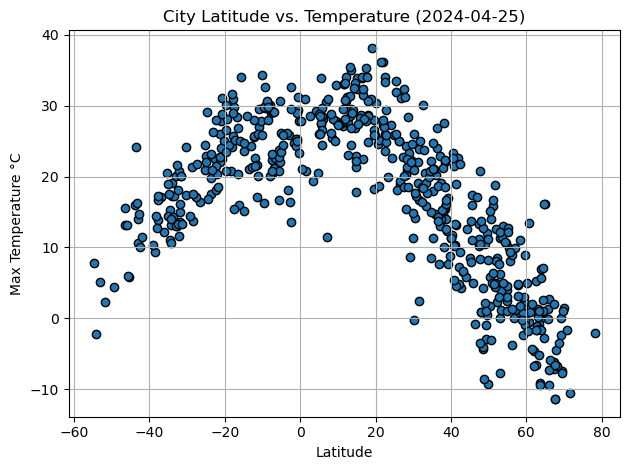

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

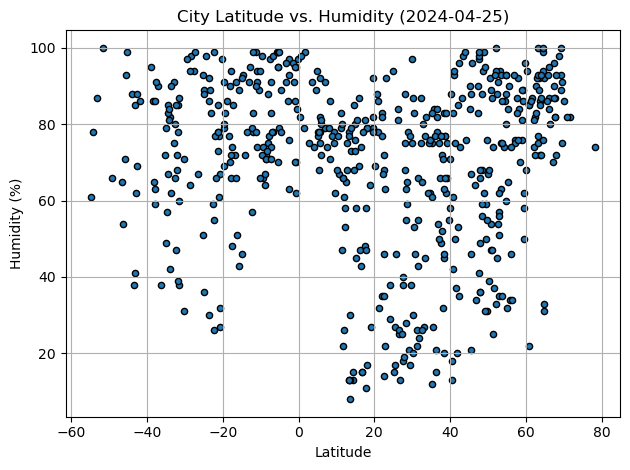

In [24]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

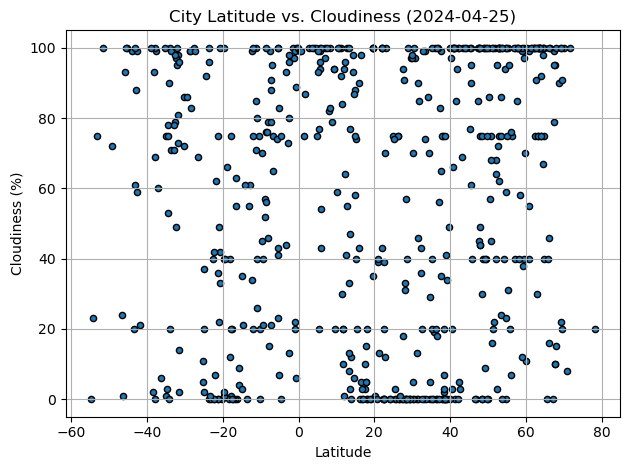

In [25]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

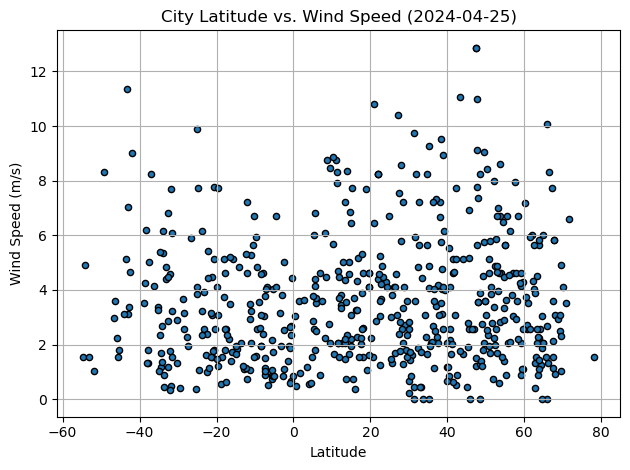

In [26]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rongelap,11.1635,166.8941,27.31,83,100,8.76,MH,2024-04-25
3,ribeira grande,38.5167,-28.7000,15.43,83,7,4.02,PT,2024-04-25
5,iqaluit,63.7506,-68.5145,-9.15,72,100,5.66,CA,2024-04-25
7,san juan de la rambla,28.3928,-16.6502,20.95,63,0,3.32,ES,2024-04-25
8,alekseyevskoye,55.3071,50.1135,9.93,65,100,0.87,RU,2024-04-25


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.95,89,2,9.89,PN,2024-04-25
2,taulaga,-11.0553,-171.0883,29.53,74,26,5.27,AS,2024-04-25
4,singkil,-7.9855,111.4161,30.06,75,46,2.39,ID,2024-04-25
6,barra dos coqueiros,-10.9089,-37.0386,27.01,94,40,2.06,BR,2024-04-25
9,port moresby,-9.4431,147.1797,32.68,66,40,2.57,PG,2024-04-25


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.56x + 35.84
The r-value is: -0.8722547228203688


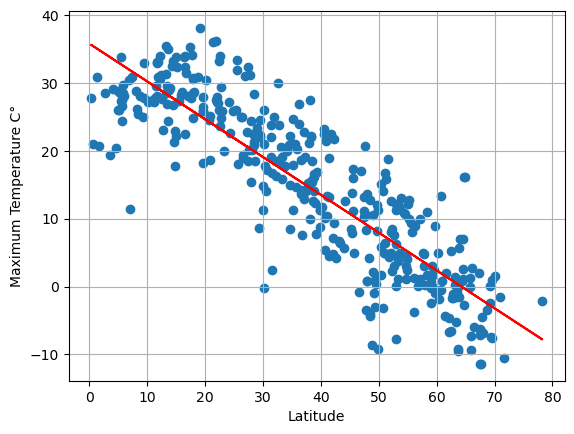

In [42]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
lr_funcV2(x,y,name,vbl)



Linear equation: y = 0.37x + 28.9
The r-value is: 0.7348988302427406


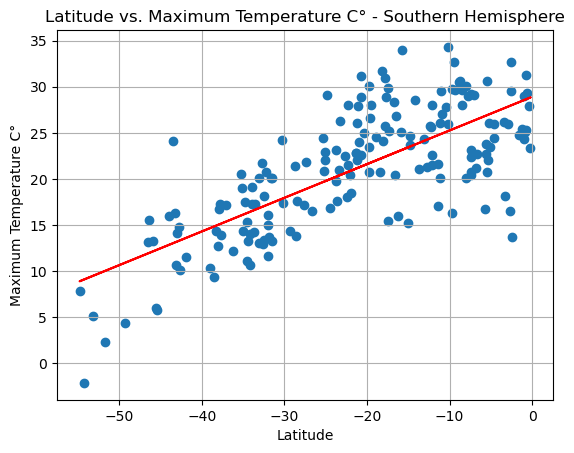

In [39]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


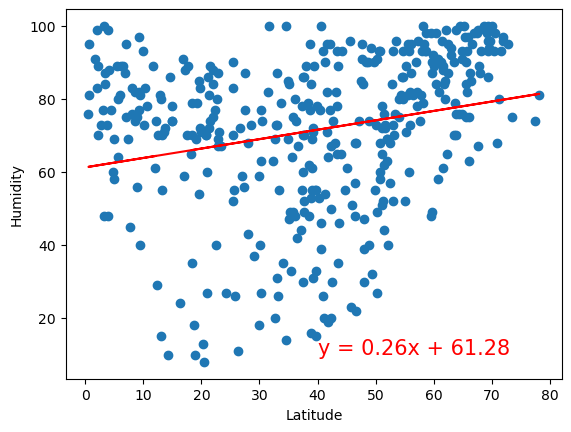

In [17]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

The r-value is: 0.0002808747046324607


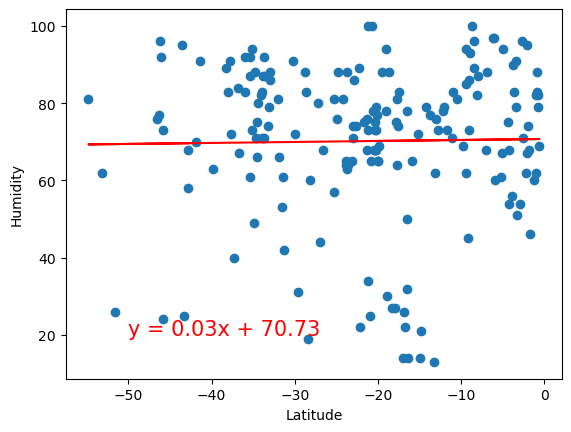

In [18]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


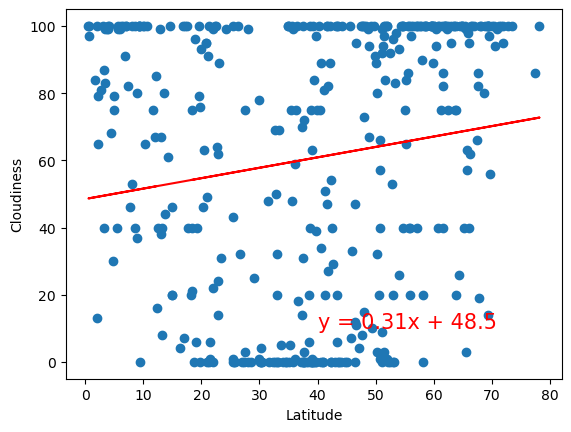

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

The r-value is: 0.02056735429994368


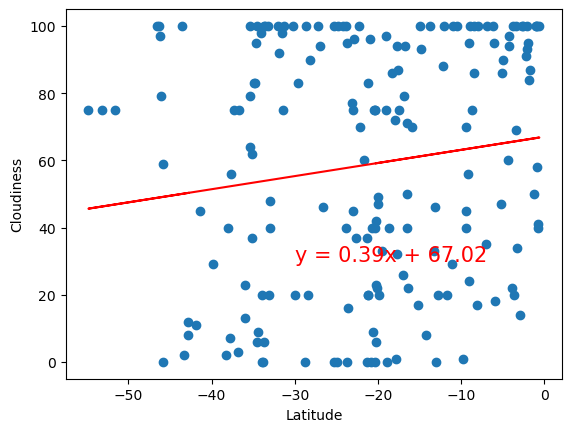

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


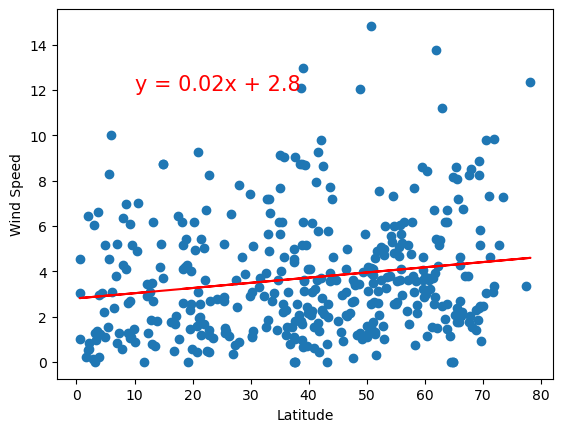

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

The r-value is: 0.062239040700515696


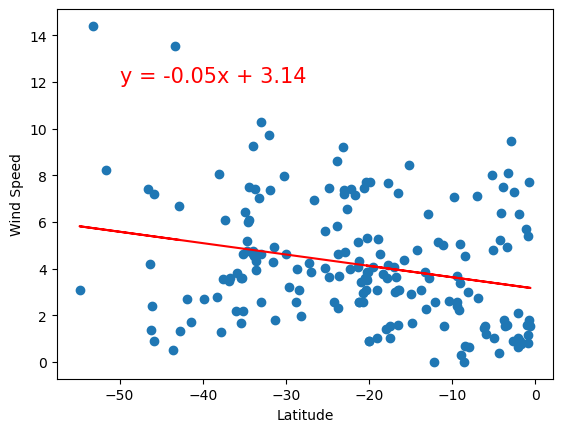

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE